# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [10]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

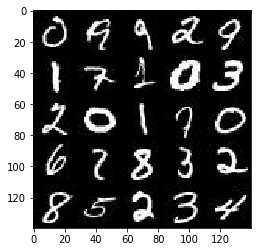

In [12]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

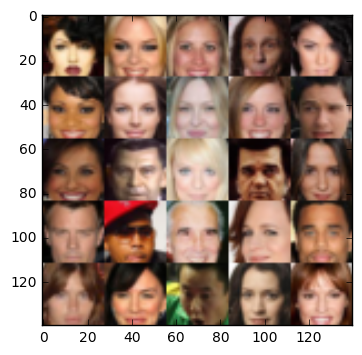

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [2]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [3]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME')
        relu1 = tf.maximum(0.01 * x1, x1)
     
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='SAME')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.01 * bn2, bn2)
        
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.01 * bn3, bn3)
     

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [4]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7,7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.01*x1, x1)
      
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.01*x2, x2)
   
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.01*x3, x3)
    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='SAME')
      
        out = tf.tanh(logits)
   
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [5]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    gen_model = generator(input_z, out_channel_dim)
    
    dis_model_real, dis_logits_real = discriminator(input_real)
    
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_logits_real) * 0.9))
    
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_logits_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_logits_fake)))
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [6]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [8]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    out_channel_dim = 3 if data_image_mode == "RGB" else 1
    
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    losses = []
    
    iteration = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                iteration += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if iteration % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    losses.append((train_loss_d, train_loss_g))
                    
                    print("Epoch {}/{}, iteration {}:".format(epoch_i + 1, epochs, iteration),
                          "Discriminator Loss: {:.4f},".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if iteration % 100 == 0:
                     show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')
        
    
    
    return losses
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2, iteration 10: Discriminator Loss: 0.4332, Generator Loss: 10.2695
Epoch 1/2, iteration 20: Discriminator Loss: 0.5759, Generator Loss: 11.4986
Epoch 1/2, iteration 30: Discriminator Loss: 0.6891, Generator Loss: 2.9414
Epoch 1/2, iteration 40: Discriminator Loss: 0.9860, Generator Loss: 1.1231
Epoch 1/2, iteration 50: Discriminator Loss: 0.7212, Generator Loss: 3.4638
Epoch 1/2, iteration 60: Discriminator Loss: 0.5920, Generator Loss: 2.0491
Epoch 1/2, iteration 70: Discriminator Loss: 0.6499, Generator Loss: 2.0662
Epoch 1/2, iteration 80: Discriminator Loss: 1.1476, Generator Loss: 1.6484
Epoch 1/2, iteration 90: Discriminator Loss: 2.3897, Generator Loss: 0.2405
Epoch 1/2, iteration 100: Discriminator Loss: 0.9696, Generator Loss: 1.3781


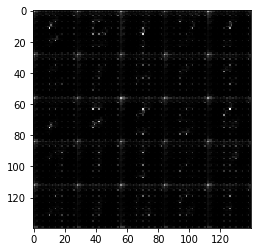

Epoch 1/2, iteration 110: Discriminator Loss: 1.0081, Generator Loss: 1.2441
Epoch 1/2, iteration 120: Discriminator Loss: 0.9283, Generator Loss: 1.1712
Epoch 1/2, iteration 130: Discriminator Loss: 1.6236, Generator Loss: 0.4222
Epoch 1/2, iteration 140: Discriminator Loss: 0.9251, Generator Loss: 2.2574
Epoch 1/2, iteration 150: Discriminator Loss: 0.9318, Generator Loss: 1.2466
Epoch 1/2, iteration 160: Discriminator Loss: 1.1270, Generator Loss: 1.4691
Epoch 1/2, iteration 170: Discriminator Loss: 1.8350, Generator Loss: 0.3291
Epoch 1/2, iteration 180: Discriminator Loss: 1.2020, Generator Loss: 0.8161
Epoch 1/2, iteration 190: Discriminator Loss: 1.1938, Generator Loss: 0.8918
Epoch 1/2, iteration 200: Discriminator Loss: 1.3984, Generator Loss: 0.5374


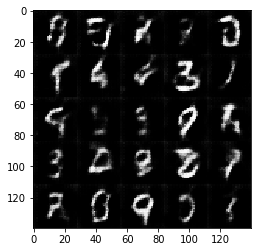

Epoch 1/2, iteration 210: Discriminator Loss: 1.1525, Generator Loss: 1.2689
Epoch 1/2, iteration 220: Discriminator Loss: 1.4185, Generator Loss: 1.6905
Epoch 1/2, iteration 230: Discriminator Loss: 1.2760, Generator Loss: 0.8730
Epoch 1/2, iteration 240: Discriminator Loss: 1.3987, Generator Loss: 0.5478
Epoch 1/2, iteration 250: Discriminator Loss: 1.2301, Generator Loss: 0.7323
Epoch 1/2, iteration 260: Discriminator Loss: 1.6237, Generator Loss: 0.4021
Epoch 1/2, iteration 270: Discriminator Loss: 1.2329, Generator Loss: 0.6266
Epoch 1/2, iteration 280: Discriminator Loss: 1.2415, Generator Loss: 0.7018
Epoch 1/2, iteration 290: Discriminator Loss: 1.1111, Generator Loss: 1.3619
Epoch 1/2, iteration 300: Discriminator Loss: 1.1893, Generator Loss: 0.9229


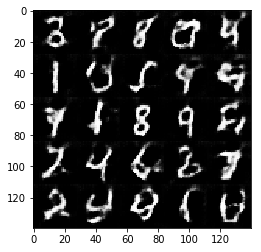

Epoch 1/2, iteration 310: Discriminator Loss: 1.1763, Generator Loss: 0.9370
Epoch 1/2, iteration 320: Discriminator Loss: 1.1015, Generator Loss: 1.1675
Epoch 1/2, iteration 330: Discriminator Loss: 1.1579, Generator Loss: 1.4343
Epoch 1/2, iteration 340: Discriminator Loss: 1.1485, Generator Loss: 0.7908
Epoch 1/2, iteration 350: Discriminator Loss: 1.1613, Generator Loss: 0.8788
Epoch 1/2, iteration 360: Discriminator Loss: 1.2384, Generator Loss: 0.8677
Epoch 1/2, iteration 370: Discriminator Loss: 2.0961, Generator Loss: 0.2431
Epoch 1/2, iteration 380: Discriminator Loss: 1.2706, Generator Loss: 0.7383
Epoch 1/2, iteration 390: Discriminator Loss: 1.2328, Generator Loss: 0.7048
Epoch 1/2, iteration 400: Discriminator Loss: 1.2031, Generator Loss: 0.7980


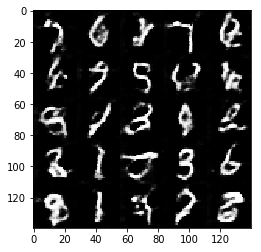

Epoch 1/2, iteration 410: Discriminator Loss: 1.2057, Generator Loss: 1.1515
Epoch 1/2, iteration 420: Discriminator Loss: 1.2622, Generator Loss: 0.7527
Epoch 1/2, iteration 430: Discriminator Loss: 1.2455, Generator Loss: 0.7203
Epoch 1/2, iteration 440: Discriminator Loss: 1.2554, Generator Loss: 0.6473
Epoch 1/2, iteration 450: Discriminator Loss: 1.2279, Generator Loss: 0.8599
Epoch 1/2, iteration 460: Discriminator Loss: 1.6465, Generator Loss: 0.3741
Epoch 2/2, iteration 470: Discriminator Loss: 1.0888, Generator Loss: 0.9630
Epoch 2/2, iteration 480: Discriminator Loss: 1.2145, Generator Loss: 1.3331
Epoch 2/2, iteration 490: Discriminator Loss: 1.1510, Generator Loss: 0.8796
Epoch 2/2, iteration 500: Discriminator Loss: 1.1593, Generator Loss: 0.7717


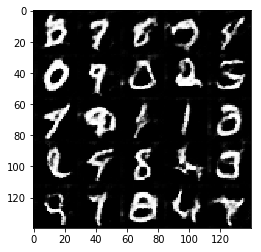

Epoch 2/2, iteration 510: Discriminator Loss: 1.1269, Generator Loss: 0.8745
Epoch 2/2, iteration 520: Discriminator Loss: 2.3789, Generator Loss: 0.2275
Epoch 2/2, iteration 530: Discriminator Loss: 1.3063, Generator Loss: 0.6790
Epoch 2/2, iteration 540: Discriminator Loss: 1.1440, Generator Loss: 1.0920
Epoch 2/2, iteration 550: Discriminator Loss: 1.1239, Generator Loss: 1.1149
Epoch 2/2, iteration 560: Discriminator Loss: 1.3278, Generator Loss: 1.7812
Epoch 2/2, iteration 570: Discriminator Loss: 1.1956, Generator Loss: 0.8100
Epoch 2/2, iteration 580: Discriminator Loss: 1.4884, Generator Loss: 0.4841
Epoch 2/2, iteration 590: Discriminator Loss: 1.0955, Generator Loss: 0.9893
Epoch 2/2, iteration 600: Discriminator Loss: 1.5091, Generator Loss: 0.4821


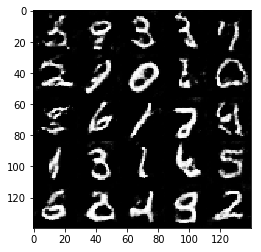

Epoch 2/2, iteration 610: Discriminator Loss: 1.2188, Generator Loss: 1.9006
Epoch 2/2, iteration 620: Discriminator Loss: 1.1820, Generator Loss: 0.7826
Epoch 2/2, iteration 630: Discriminator Loss: 1.0970, Generator Loss: 1.2705
Epoch 2/2, iteration 640: Discriminator Loss: 2.5863, Generator Loss: 0.1351
Epoch 2/2, iteration 650: Discriminator Loss: 1.1928, Generator Loss: 0.8061
Epoch 2/2, iteration 660: Discriminator Loss: 1.2077, Generator Loss: 0.8417
Epoch 2/2, iteration 670: Discriminator Loss: 1.1729, Generator Loss: 1.0980
Epoch 2/2, iteration 680: Discriminator Loss: 1.6166, Generator Loss: 0.3783
Epoch 2/2, iteration 690: Discriminator Loss: 1.2752, Generator Loss: 0.6100
Epoch 2/2, iteration 700: Discriminator Loss: 1.5914, Generator Loss: 2.2738


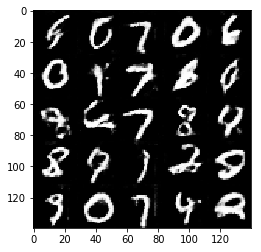

Epoch 2/2, iteration 710: Discriminator Loss: 1.1589, Generator Loss: 0.8775
Epoch 2/2, iteration 720: Discriminator Loss: 1.4200, Generator Loss: 0.5116
Epoch 2/2, iteration 730: Discriminator Loss: 1.1704, Generator Loss: 0.6760
Epoch 2/2, iteration 740: Discriminator Loss: 1.6593, Generator Loss: 0.3605
Epoch 2/2, iteration 750: Discriminator Loss: 1.3101, Generator Loss: 0.6007
Epoch 2/2, iteration 760: Discriminator Loss: 1.0593, Generator Loss: 1.0972
Epoch 2/2, iteration 770: Discriminator Loss: 1.3099, Generator Loss: 0.6154
Epoch 2/2, iteration 780: Discriminator Loss: 1.1673, Generator Loss: 0.8462
Epoch 2/2, iteration 790: Discriminator Loss: 1.2067, Generator Loss: 1.3673
Epoch 2/2, iteration 800: Discriminator Loss: 1.0886, Generator Loss: 1.2741


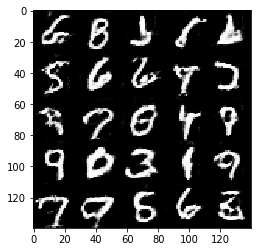

Epoch 2/2, iteration 810: Discriminator Loss: 1.6925, Generator Loss: 0.3768
Epoch 2/2, iteration 820: Discriminator Loss: 1.0808, Generator Loss: 0.8727
Epoch 2/2, iteration 830: Discriminator Loss: 1.1880, Generator Loss: 0.8436
Epoch 2/2, iteration 840: Discriminator Loss: 0.9953, Generator Loss: 1.2638
Epoch 2/2, iteration 850: Discriminator Loss: 1.0078, Generator Loss: 1.4285
Epoch 2/2, iteration 860: Discriminator Loss: 1.0334, Generator Loss: 1.0832
Epoch 2/2, iteration 870: Discriminator Loss: 1.2373, Generator Loss: 0.9010
Epoch 2/2, iteration 880: Discriminator Loss: 1.1249, Generator Loss: 1.3141
Epoch 2/2, iteration 890: Discriminator Loss: 0.9887, Generator Loss: 1.0985
Epoch 2/2, iteration 900: Discriminator Loss: 1.3882, Generator Loss: 0.5642


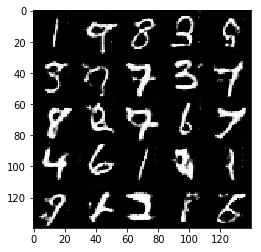

Epoch 2/2, iteration 910: Discriminator Loss: 1.1039, Generator Loss: 1.1605
Epoch 2/2, iteration 920: Discriminator Loss: 1.1997, Generator Loss: 0.7121
Epoch 2/2, iteration 930: Discriminator Loss: 1.2173, Generator Loss: 1.0103


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [14]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1, iteration 10: Discriminator Loss: 1.6900, Generator Loss: 0.4195
Epoch 1/1, iteration 20: Discriminator Loss: 1.0607, Generator Loss: 0.8986
Epoch 1/1, iteration 30: Discriminator Loss: 0.7617, Generator Loss: 1.4258
Epoch 1/1, iteration 40: Discriminator Loss: 0.5638, Generator Loss: 2.0180
Epoch 1/1, iteration 50: Discriminator Loss: 0.5992, Generator Loss: 1.8673
Epoch 1/1, iteration 60: Discriminator Loss: 0.6419, Generator Loss: 2.0053
Epoch 1/1, iteration 70: Discriminator Loss: 0.5850, Generator Loss: 2.3010
Epoch 1/1, iteration 80: Discriminator Loss: 0.6109, Generator Loss: 1.8891
Epoch 1/1, iteration 90: Discriminator Loss: 0.4957, Generator Loss: 2.9424
Epoch 1/1, iteration 100: Discriminator Loss: 0.5514, Generator Loss: 2.3243


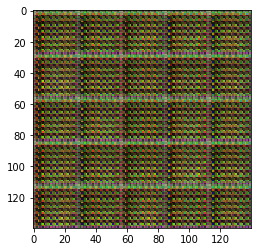

Epoch 1/1, iteration 110: Discriminator Loss: 0.8115, Generator Loss: 1.3280
Epoch 1/1, iteration 120: Discriminator Loss: 0.7016, Generator Loss: 2.0335
Epoch 1/1, iteration 130: Discriminator Loss: 0.8597, Generator Loss: 1.9634
Epoch 1/1, iteration 140: Discriminator Loss: 0.6724, Generator Loss: 1.8347
Epoch 1/1, iteration 150: Discriminator Loss: 0.8222, Generator Loss: 1.9512
Epoch 1/1, iteration 160: Discriminator Loss: 0.7006, Generator Loss: 1.6646
Epoch 1/1, iteration 170: Discriminator Loss: 0.8175, Generator Loss: 1.5157
Epoch 1/1, iteration 180: Discriminator Loss: 0.8563, Generator Loss: 1.2408
Epoch 1/1, iteration 190: Discriminator Loss: 0.6772, Generator Loss: 2.0547
Epoch 1/1, iteration 200: Discriminator Loss: 0.7736, Generator Loss: 1.5334


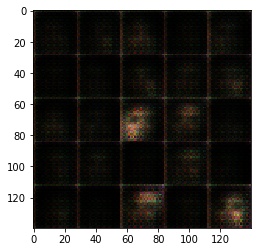

Epoch 1/1, iteration 210: Discriminator Loss: 0.8635, Generator Loss: 1.4584
Epoch 1/1, iteration 220: Discriminator Loss: 0.8445, Generator Loss: 1.1702
Epoch 1/1, iteration 230: Discriminator Loss: 0.7864, Generator Loss: 1.5986
Epoch 1/1, iteration 240: Discriminator Loss: 0.8340, Generator Loss: 1.4385
Epoch 1/1, iteration 250: Discriminator Loss: 0.6692, Generator Loss: 1.9116
Epoch 1/1, iteration 260: Discriminator Loss: 0.6860, Generator Loss: 1.8627
Epoch 1/1, iteration 270: Discriminator Loss: 0.9493, Generator Loss: 1.2553
Epoch 1/1, iteration 280: Discriminator Loss: 0.9330, Generator Loss: 0.9939
Epoch 1/1, iteration 290: Discriminator Loss: 1.1381, Generator Loss: 0.8192
Epoch 1/1, iteration 300: Discriminator Loss: 0.8056, Generator Loss: 2.3097


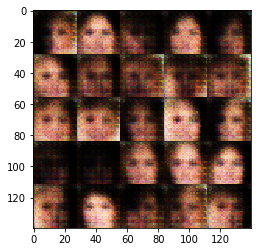

Epoch 1/1, iteration 310: Discriminator Loss: 0.7847, Generator Loss: 1.5812
Epoch 1/1, iteration 320: Discriminator Loss: 0.8002, Generator Loss: 1.4902
Epoch 1/1, iteration 330: Discriminator Loss: 0.6293, Generator Loss: 1.9726
Epoch 1/1, iteration 340: Discriminator Loss: 0.7476, Generator Loss: 1.9256
Epoch 1/1, iteration 350: Discriminator Loss: 0.9717, Generator Loss: 1.3187
Epoch 1/1, iteration 360: Discriminator Loss: 1.5544, Generator Loss: 0.4477
Epoch 1/1, iteration 370: Discriminator Loss: 0.9191, Generator Loss: 1.1955
Epoch 1/1, iteration 380: Discriminator Loss: 0.7712, Generator Loss: 1.4964
Epoch 1/1, iteration 390: Discriminator Loss: 0.9480, Generator Loss: 2.2534
Epoch 1/1, iteration 400: Discriminator Loss: 0.9372, Generator Loss: 1.2638


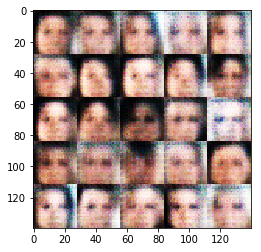

Epoch 1/1, iteration 410: Discriminator Loss: 0.7959, Generator Loss: 1.4672
Epoch 1/1, iteration 420: Discriminator Loss: 0.8346, Generator Loss: 1.3418
Epoch 1/1, iteration 430: Discriminator Loss: 0.9938, Generator Loss: 1.2631
Epoch 1/1, iteration 440: Discriminator Loss: 0.8119, Generator Loss: 1.7335
Epoch 1/1, iteration 450: Discriminator Loss: 0.7667, Generator Loss: 1.6626
Epoch 1/1, iteration 460: Discriminator Loss: 0.8812, Generator Loss: 1.4686
Epoch 1/1, iteration 470: Discriminator Loss: 1.0288, Generator Loss: 1.1139
Epoch 1/1, iteration 480: Discriminator Loss: 0.9150, Generator Loss: 1.0208
Epoch 1/1, iteration 490: Discriminator Loss: 0.9574, Generator Loss: 1.9550
Epoch 1/1, iteration 500: Discriminator Loss: 0.8459, Generator Loss: 1.1823


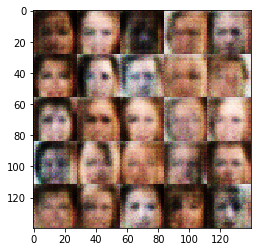

Epoch 1/1, iteration 510: Discriminator Loss: 1.0176, Generator Loss: 0.9925
Epoch 1/1, iteration 520: Discriminator Loss: 1.1040, Generator Loss: 1.3713
Epoch 1/1, iteration 530: Discriminator Loss: 0.9179, Generator Loss: 1.1434
Epoch 1/1, iteration 540: Discriminator Loss: 1.5089, Generator Loss: 0.4458
Epoch 1/1, iteration 550: Discriminator Loss: 1.0236, Generator Loss: 1.1389
Epoch 1/1, iteration 560: Discriminator Loss: 0.8881, Generator Loss: 1.5695
Epoch 1/1, iteration 570: Discriminator Loss: 1.0823, Generator Loss: 1.1625
Epoch 1/1, iteration 580: Discriminator Loss: 1.0234, Generator Loss: 1.0815
Epoch 1/1, iteration 590: Discriminator Loss: 1.1269, Generator Loss: 1.3139
Epoch 1/1, iteration 600: Discriminator Loss: 1.0700, Generator Loss: 1.4025


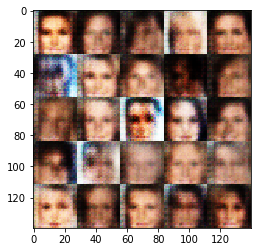

Epoch 1/1, iteration 610: Discriminator Loss: 0.9183, Generator Loss: 1.4845
Epoch 1/1, iteration 620: Discriminator Loss: 1.0169, Generator Loss: 1.2743
Epoch 1/1, iteration 630: Discriminator Loss: 0.9939, Generator Loss: 1.2274
Epoch 1/1, iteration 640: Discriminator Loss: 1.1185, Generator Loss: 1.9779
Epoch 1/1, iteration 650: Discriminator Loss: 0.9471, Generator Loss: 1.0597
Epoch 1/1, iteration 660: Discriminator Loss: 1.2521, Generator Loss: 0.7055
Epoch 1/1, iteration 670: Discriminator Loss: 1.0239, Generator Loss: 0.8858
Epoch 1/1, iteration 680: Discriminator Loss: 0.9811, Generator Loss: 1.3933
Epoch 1/1, iteration 690: Discriminator Loss: 1.1728, Generator Loss: 0.9090
Epoch 1/1, iteration 700: Discriminator Loss: 0.9931, Generator Loss: 1.2196


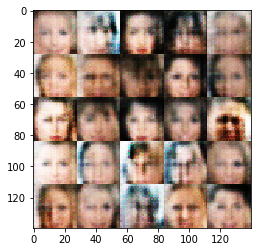

Epoch 1/1, iteration 710: Discriminator Loss: 0.9602, Generator Loss: 1.3440
Epoch 1/1, iteration 720: Discriminator Loss: 0.9859, Generator Loss: 1.1701
Epoch 1/1, iteration 730: Discriminator Loss: 0.9481, Generator Loss: 1.4202
Epoch 1/1, iteration 740: Discriminator Loss: 0.9354, Generator Loss: 1.1770
Epoch 1/1, iteration 750: Discriminator Loss: 0.9684, Generator Loss: 1.5178
Epoch 1/1, iteration 760: Discriminator Loss: 0.9972, Generator Loss: 1.0710
Epoch 1/1, iteration 770: Discriminator Loss: 0.9683, Generator Loss: 1.5073
Epoch 1/1, iteration 780: Discriminator Loss: 0.9822, Generator Loss: 1.0665
Epoch 1/1, iteration 790: Discriminator Loss: 0.9970, Generator Loss: 1.1826
Epoch 1/1, iteration 800: Discriminator Loss: 1.0672, Generator Loss: 0.9864


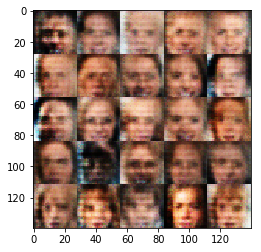

Epoch 1/1, iteration 810: Discriminator Loss: 1.5084, Generator Loss: 0.4889
Epoch 1/1, iteration 820: Discriminator Loss: 1.0971, Generator Loss: 1.6013
Epoch 1/1, iteration 830: Discriminator Loss: 1.1607, Generator Loss: 0.8841
Epoch 1/1, iteration 840: Discriminator Loss: 1.1416, Generator Loss: 0.8926
Epoch 1/1, iteration 850: Discriminator Loss: 1.0327, Generator Loss: 1.1275
Epoch 1/1, iteration 860: Discriminator Loss: 1.2705, Generator Loss: 0.6843
Epoch 1/1, iteration 870: Discriminator Loss: 1.1767, Generator Loss: 0.8388
Epoch 1/1, iteration 880: Discriminator Loss: 1.1244, Generator Loss: 1.0764
Epoch 1/1, iteration 890: Discriminator Loss: 1.1154, Generator Loss: 1.2028
Epoch 1/1, iteration 900: Discriminator Loss: 1.1114, Generator Loss: 0.9770


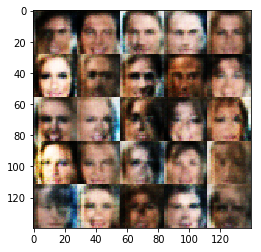

Epoch 1/1, iteration 910: Discriminator Loss: 1.1255, Generator Loss: 1.7333
Epoch 1/1, iteration 920: Discriminator Loss: 0.9878, Generator Loss: 1.2528
Epoch 1/1, iteration 930: Discriminator Loss: 1.0603, Generator Loss: 1.1084
Epoch 1/1, iteration 940: Discriminator Loss: 0.9690, Generator Loss: 1.0615
Epoch 1/1, iteration 950: Discriminator Loss: 1.3062, Generator Loss: 0.6173
Epoch 1/1, iteration 960: Discriminator Loss: 1.0965, Generator Loss: 1.3992
Epoch 1/1, iteration 970: Discriminator Loss: 1.0951, Generator Loss: 0.8848
Epoch 1/1, iteration 980: Discriminator Loss: 0.9973, Generator Loss: 1.3019
Epoch 1/1, iteration 990: Discriminator Loss: 0.9574, Generator Loss: 1.3241
Epoch 1/1, iteration 1000: Discriminator Loss: 1.0601, Generator Loss: 1.9240


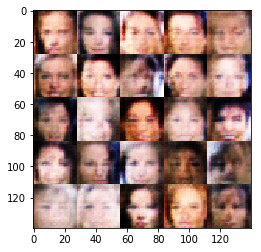

Epoch 1/1, iteration 1010: Discriminator Loss: 0.8772, Generator Loss: 1.5991
Epoch 1/1, iteration 1020: Discriminator Loss: 1.3431, Generator Loss: 2.2551
Epoch 1/1, iteration 1030: Discriminator Loss: 1.0156, Generator Loss: 1.2606
Epoch 1/1, iteration 1040: Discriminator Loss: 0.9552, Generator Loss: 1.7017
Epoch 1/1, iteration 1050: Discriminator Loss: 1.0136, Generator Loss: 1.5840
Epoch 1/1, iteration 1060: Discriminator Loss: 1.1199, Generator Loss: 0.9039
Epoch 1/1, iteration 1070: Discriminator Loss: 1.2496, Generator Loss: 0.6606
Epoch 1/1, iteration 1080: Discriminator Loss: 1.2622, Generator Loss: 1.3946
Epoch 1/1, iteration 1090: Discriminator Loss: 1.2386, Generator Loss: 0.8279
Epoch 1/1, iteration 1100: Discriminator Loss: 0.8999, Generator Loss: 1.8551


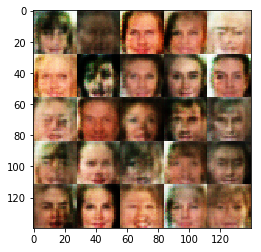

Epoch 1/1, iteration 1110: Discriminator Loss: 1.1096, Generator Loss: 1.2707
Epoch 1/1, iteration 1120: Discriminator Loss: 1.1648, Generator Loss: 0.8622
Epoch 1/1, iteration 1130: Discriminator Loss: 1.2883, Generator Loss: 0.6634
Epoch 1/1, iteration 1140: Discriminator Loss: 1.0523, Generator Loss: 1.3603
Epoch 1/1, iteration 1150: Discriminator Loss: 0.9911, Generator Loss: 1.0838
Epoch 1/1, iteration 1160: Discriminator Loss: 1.2084, Generator Loss: 0.6927
Epoch 1/1, iteration 1170: Discriminator Loss: 0.8386, Generator Loss: 1.4959
Epoch 1/1, iteration 1180: Discriminator Loss: 1.0672, Generator Loss: 1.5288
Epoch 1/1, iteration 1190: Discriminator Loss: 1.1783, Generator Loss: 1.0906
Epoch 1/1, iteration 1200: Discriminator Loss: 1.0410, Generator Loss: 0.9021


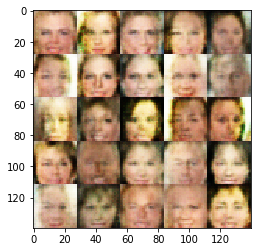

Epoch 1/1, iteration 1210: Discriminator Loss: 1.1647, Generator Loss: 0.7187
Epoch 1/1, iteration 1220: Discriminator Loss: 0.9441, Generator Loss: 1.6771
Epoch 1/1, iteration 1230: Discriminator Loss: 1.1368, Generator Loss: 0.7816
Epoch 1/1, iteration 1240: Discriminator Loss: 1.3098, Generator Loss: 0.6956
Epoch 1/1, iteration 1250: Discriminator Loss: 1.1529, Generator Loss: 0.8948
Epoch 1/1, iteration 1260: Discriminator Loss: 1.0634, Generator Loss: 1.0371
Epoch 1/1, iteration 1270: Discriminator Loss: 1.0581, Generator Loss: 1.0657
Epoch 1/1, iteration 1280: Discriminator Loss: 1.2465, Generator Loss: 1.7090
Epoch 1/1, iteration 1290: Discriminator Loss: 1.2866, Generator Loss: 0.6623
Epoch 1/1, iteration 1300: Discriminator Loss: 1.1895, Generator Loss: 0.7634


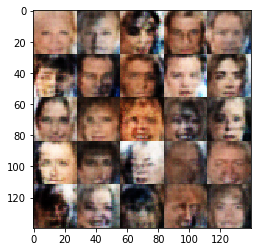

Epoch 1/1, iteration 1310: Discriminator Loss: 1.0560, Generator Loss: 1.1379
Epoch 1/1, iteration 1320: Discriminator Loss: 1.0355, Generator Loss: 1.3157
Epoch 1/1, iteration 1330: Discriminator Loss: 1.0571, Generator Loss: 0.9771
Epoch 1/1, iteration 1340: Discriminator Loss: 0.9913, Generator Loss: 0.9448
Epoch 1/1, iteration 1350: Discriminator Loss: 0.7869, Generator Loss: 1.7864
Epoch 1/1, iteration 1360: Discriminator Loss: 1.0092, Generator Loss: 1.1704
Epoch 1/1, iteration 1370: Discriminator Loss: 0.9568, Generator Loss: 1.1673
Epoch 1/1, iteration 1380: Discriminator Loss: 0.9960, Generator Loss: 0.9301
Epoch 1/1, iteration 1390: Discriminator Loss: 1.1079, Generator Loss: 1.1060
Epoch 1/1, iteration 1400: Discriminator Loss: 1.0411, Generator Loss: 0.8265


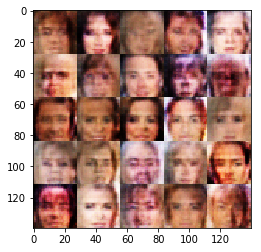

Epoch 1/1, iteration 1410: Discriminator Loss: 1.0603, Generator Loss: 1.2878
Epoch 1/1, iteration 1420: Discriminator Loss: 0.9417, Generator Loss: 1.4122
Epoch 1/1, iteration 1430: Discriminator Loss: 1.2953, Generator Loss: 0.7372
Epoch 1/1, iteration 1440: Discriminator Loss: 0.9657, Generator Loss: 1.4060
Epoch 1/1, iteration 1450: Discriminator Loss: 1.2963, Generator Loss: 0.7263
Epoch 1/1, iteration 1460: Discriminator Loss: 0.9881, Generator Loss: 1.0406
Epoch 1/1, iteration 1470: Discriminator Loss: 1.0580, Generator Loss: 1.1394
Epoch 1/1, iteration 1480: Discriminator Loss: 1.1600, Generator Loss: 1.0427
Epoch 1/1, iteration 1490: Discriminator Loss: 1.0267, Generator Loss: 1.1933
Epoch 1/1, iteration 1500: Discriminator Loss: 1.0791, Generator Loss: 1.3512


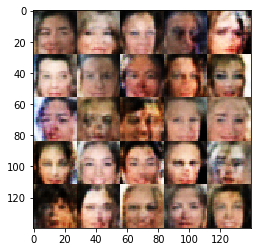

Epoch 1/1, iteration 1510: Discriminator Loss: 1.1590, Generator Loss: 1.1812
Epoch 1/1, iteration 1520: Discriminator Loss: 0.9896, Generator Loss: 1.0452
Epoch 1/1, iteration 1530: Discriminator Loss: 1.3191, Generator Loss: 0.6675
Epoch 1/1, iteration 1540: Discriminator Loss: 1.2776, Generator Loss: 0.7368
Epoch 1/1, iteration 1550: Discriminator Loss: 1.2556, Generator Loss: 0.7627
Epoch 1/1, iteration 1560: Discriminator Loss: 1.0057, Generator Loss: 0.9610
Epoch 1/1, iteration 1570: Discriminator Loss: 1.0907, Generator Loss: 0.9964
Epoch 1/1, iteration 1580: Discriminator Loss: 1.5843, Generator Loss: 0.4119
Epoch 1/1, iteration 1590: Discriminator Loss: 1.0775, Generator Loss: 1.0542
Epoch 1/1, iteration 1600: Discriminator Loss: 1.1351, Generator Loss: 1.1825


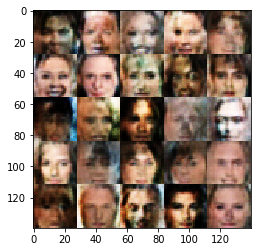

Epoch 1/1, iteration 1610: Discriminator Loss: 0.8976, Generator Loss: 1.1904
Epoch 1/1, iteration 1620: Discriminator Loss: 1.0776, Generator Loss: 1.1133
Epoch 1/1, iteration 1630: Discriminator Loss: 1.1768, Generator Loss: 1.1645
Epoch 1/1, iteration 1640: Discriminator Loss: 1.0038, Generator Loss: 1.6101
Epoch 1/1, iteration 1650: Discriminator Loss: 1.0479, Generator Loss: 1.0545
Epoch 1/1, iteration 1660: Discriminator Loss: 1.0903, Generator Loss: 1.2677
Epoch 1/1, iteration 1670: Discriminator Loss: 1.1283, Generator Loss: 0.8920
Epoch 1/1, iteration 1680: Discriminator Loss: 1.5516, Generator Loss: 0.4605
Epoch 1/1, iteration 1690: Discriminator Loss: 0.9994, Generator Loss: 1.3475
Epoch 1/1, iteration 1700: Discriminator Loss: 1.0260, Generator Loss: 0.9161


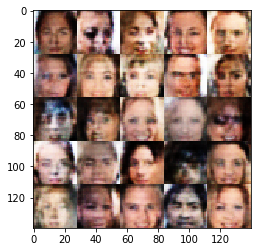

Epoch 1/1, iteration 1710: Discriminator Loss: 1.2096, Generator Loss: 0.7667
Epoch 1/1, iteration 1720: Discriminator Loss: 1.1834, Generator Loss: 0.6991
Epoch 1/1, iteration 1730: Discriminator Loss: 1.3877, Generator Loss: 0.5340
Epoch 1/1, iteration 1740: Discriminator Loss: 0.9139, Generator Loss: 1.4251
Epoch 1/1, iteration 1750: Discriminator Loss: 1.4440, Generator Loss: 0.4891
Epoch 1/1, iteration 1760: Discriminator Loss: 1.1588, Generator Loss: 0.9242
Epoch 1/1, iteration 1770: Discriminator Loss: 1.2913, Generator Loss: 0.6436
Epoch 1/1, iteration 1780: Discriminator Loss: 1.0862, Generator Loss: 1.3569
Epoch 1/1, iteration 1790: Discriminator Loss: 1.1845, Generator Loss: 0.7234
Epoch 1/1, iteration 1800: Discriminator Loss: 1.1813, Generator Loss: 0.9712


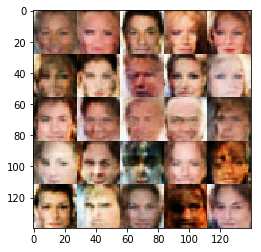

Epoch 1/1, iteration 1810: Discriminator Loss: 1.1367, Generator Loss: 0.7931
Epoch 1/1, iteration 1820: Discriminator Loss: 0.8840, Generator Loss: 1.3085
Epoch 1/1, iteration 1830: Discriminator Loss: 1.1245, Generator Loss: 0.9794
Epoch 1/1, iteration 1840: Discriminator Loss: 1.4306, Generator Loss: 0.4922
Epoch 1/1, iteration 1850: Discriminator Loss: 1.0105, Generator Loss: 1.0890
Epoch 1/1, iteration 1860: Discriminator Loss: 1.3850, Generator Loss: 0.6218
Epoch 1/1, iteration 1870: Discriminator Loss: 0.9063, Generator Loss: 1.6176
Epoch 1/1, iteration 1880: Discriminator Loss: 1.0593, Generator Loss: 0.9581
Epoch 1/1, iteration 1890: Discriminator Loss: 1.0684, Generator Loss: 1.2063
Epoch 1/1, iteration 1900: Discriminator Loss: 0.9132, Generator Loss: 1.6499


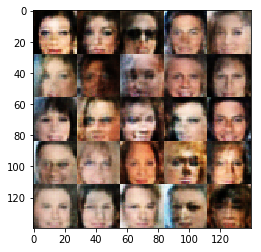

Epoch 1/1, iteration 1910: Discriminator Loss: 1.1135, Generator Loss: 1.3609
Epoch 1/1, iteration 1920: Discriminator Loss: 0.9566, Generator Loss: 1.3327
Epoch 1/1, iteration 1930: Discriminator Loss: 1.2478, Generator Loss: 0.6506
Epoch 1/1, iteration 1940: Discriminator Loss: 0.7489, Generator Loss: 1.5304
Epoch 1/1, iteration 1950: Discriminator Loss: 1.1797, Generator Loss: 0.9084
Epoch 1/1, iteration 1960: Discriminator Loss: 1.2678, Generator Loss: 0.6833
Epoch 1/1, iteration 1970: Discriminator Loss: 1.0931, Generator Loss: 1.0948
Epoch 1/1, iteration 1980: Discriminator Loss: 1.1517, Generator Loss: 0.8343
Epoch 1/1, iteration 1990: Discriminator Loss: 1.2792, Generator Loss: 0.6574
Epoch 1/1, iteration 2000: Discriminator Loss: 1.1182, Generator Loss: 0.8534


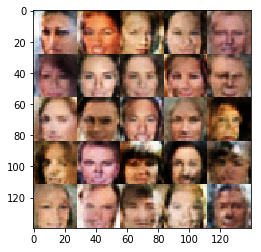

Epoch 1/1, iteration 2010: Discriminator Loss: 0.9239, Generator Loss: 1.4497
Epoch 1/1, iteration 2020: Discriminator Loss: 0.9593, Generator Loss: 1.1304
Epoch 1/1, iteration 2030: Discriminator Loss: 1.1960, Generator Loss: 0.7658
Epoch 1/1, iteration 2040: Discriminator Loss: 1.0863, Generator Loss: 0.8609
Epoch 1/1, iteration 2050: Discriminator Loss: 1.1236, Generator Loss: 1.3320
Epoch 1/1, iteration 2060: Discriminator Loss: 1.4503, Generator Loss: 0.7896
Epoch 1/1, iteration 2070: Discriminator Loss: 1.0737, Generator Loss: 1.0230
Epoch 1/1, iteration 2080: Discriminator Loss: 0.9779, Generator Loss: 1.5347
Epoch 1/1, iteration 2090: Discriminator Loss: 1.1652, Generator Loss: 0.8034
Epoch 1/1, iteration 2100: Discriminator Loss: 1.2150, Generator Loss: 0.6868


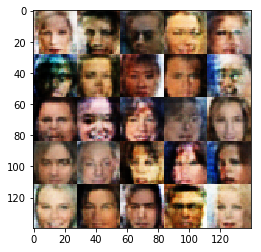

Epoch 1/1, iteration 2110: Discriminator Loss: 1.5585, Generator Loss: 0.4209
Epoch 1/1, iteration 2120: Discriminator Loss: 0.9336, Generator Loss: 1.1001
Epoch 1/1, iteration 2130: Discriminator Loss: 0.7644, Generator Loss: 1.6297
Epoch 1/1, iteration 2140: Discriminator Loss: 1.1162, Generator Loss: 1.0080
Epoch 1/1, iteration 2150: Discriminator Loss: 1.1999, Generator Loss: 0.7310
Epoch 1/1, iteration 2160: Discriminator Loss: 1.1224, Generator Loss: 0.8895
Epoch 1/1, iteration 2170: Discriminator Loss: 0.9373, Generator Loss: 1.3149
Epoch 1/1, iteration 2180: Discriminator Loss: 1.3054, Generator Loss: 0.6133
Epoch 1/1, iteration 2190: Discriminator Loss: 1.3066, Generator Loss: 0.7007
Epoch 1/1, iteration 2200: Discriminator Loss: 0.9256, Generator Loss: 1.3651


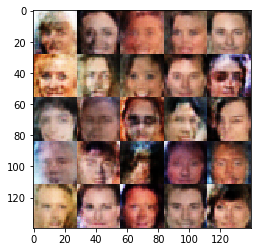

Epoch 1/1, iteration 2210: Discriminator Loss: 1.2960, Generator Loss: 0.9491
Epoch 1/1, iteration 2220: Discriminator Loss: 0.8682, Generator Loss: 1.5022
Epoch 1/1, iteration 2230: Discriminator Loss: 1.4556, Generator Loss: 0.4725
Epoch 1/1, iteration 2240: Discriminator Loss: 1.5319, Generator Loss: 0.4885
Epoch 1/1, iteration 2250: Discriminator Loss: 1.0903, Generator Loss: 1.0258
Epoch 1/1, iteration 2260: Discriminator Loss: 1.3860, Generator Loss: 0.5384
Epoch 1/1, iteration 2270: Discriminator Loss: 1.0617, Generator Loss: 0.8504
Epoch 1/1, iteration 2280: Discriminator Loss: 1.1865, Generator Loss: 0.7609
Epoch 1/1, iteration 2290: Discriminator Loss: 1.0574, Generator Loss: 1.2901
Epoch 1/1, iteration 2300: Discriminator Loss: 1.1864, Generator Loss: 0.8888


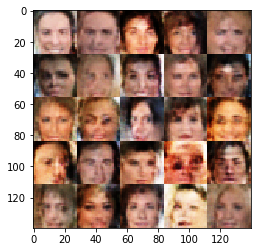

Epoch 1/1, iteration 2310: Discriminator Loss: 0.9995, Generator Loss: 1.0295
Epoch 1/1, iteration 2320: Discriminator Loss: 1.3540, Generator Loss: 0.6124
Epoch 1/1, iteration 2330: Discriminator Loss: 1.5238, Generator Loss: 0.5034
Epoch 1/1, iteration 2340: Discriminator Loss: 1.0736, Generator Loss: 0.9124
Epoch 1/1, iteration 2350: Discriminator Loss: 1.1266, Generator Loss: 0.9143
Epoch 1/1, iteration 2360: Discriminator Loss: 1.4508, Generator Loss: 0.4843
Epoch 1/1, iteration 2370: Discriminator Loss: 0.8424, Generator Loss: 1.4784
Epoch 1/1, iteration 2380: Discriminator Loss: 0.8552, Generator Loss: 1.2000
Epoch 1/1, iteration 2390: Discriminator Loss: 1.2152, Generator Loss: 1.1599
Epoch 1/1, iteration 2400: Discriminator Loss: 1.0690, Generator Loss: 1.0775


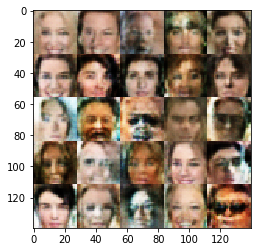

Epoch 1/1, iteration 2410: Discriminator Loss: 1.1271, Generator Loss: 0.9748
Epoch 1/1, iteration 2420: Discriminator Loss: 0.9760, Generator Loss: 1.1029
Epoch 1/1, iteration 2430: Discriminator Loss: 1.1642, Generator Loss: 0.7696
Epoch 1/1, iteration 2440: Discriminator Loss: 1.2216, Generator Loss: 1.3721
Epoch 1/1, iteration 2450: Discriminator Loss: 1.1576, Generator Loss: 0.8764
Epoch 1/1, iteration 2460: Discriminator Loss: 1.1551, Generator Loss: 0.7755
Epoch 1/1, iteration 2470: Discriminator Loss: 1.2073, Generator Loss: 0.6874
Epoch 1/1, iteration 2480: Discriminator Loss: 1.2566, Generator Loss: 0.6297
Epoch 1/1, iteration 2490: Discriminator Loss: 0.9735, Generator Loss: 1.0671
Epoch 1/1, iteration 2500: Discriminator Loss: 1.0578, Generator Loss: 0.8995


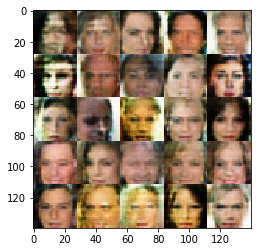

Epoch 1/1, iteration 2510: Discriminator Loss: 1.1613, Generator Loss: 1.2166
Epoch 1/1, iteration 2520: Discriminator Loss: 0.9968, Generator Loss: 1.2109
Epoch 1/1, iteration 2530: Discriminator Loss: 1.3987, Generator Loss: 0.5127
Epoch 1/1, iteration 2540: Discriminator Loss: 1.2709, Generator Loss: 0.7153
Epoch 1/1, iteration 2550: Discriminator Loss: 1.1591, Generator Loss: 0.7434
Epoch 1/1, iteration 2560: Discriminator Loss: 1.1340, Generator Loss: 0.8758
Epoch 1/1, iteration 2570: Discriminator Loss: 1.2218, Generator Loss: 1.6456
Epoch 1/1, iteration 2580: Discriminator Loss: 1.0703, Generator Loss: 0.8360
Epoch 1/1, iteration 2590: Discriminator Loss: 1.0946, Generator Loss: 1.2578
Epoch 1/1, iteration 2600: Discriminator Loss: 1.0232, Generator Loss: 0.9723


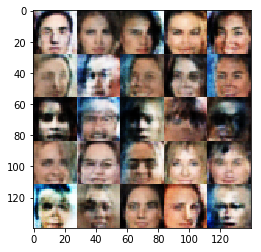

Epoch 1/1, iteration 2610: Discriminator Loss: 0.9375, Generator Loss: 1.1464
Epoch 1/1, iteration 2620: Discriminator Loss: 1.0781, Generator Loss: 0.8293
Epoch 1/1, iteration 2630: Discriminator Loss: 1.3140, Generator Loss: 0.6459
Epoch 1/1, iteration 2640: Discriminator Loss: 1.1220, Generator Loss: 1.3684
Epoch 1/1, iteration 2650: Discriminator Loss: 1.4813, Generator Loss: 0.4602
Epoch 1/1, iteration 2660: Discriminator Loss: 1.3909, Generator Loss: 0.8007
Epoch 1/1, iteration 2670: Discriminator Loss: 1.3821, Generator Loss: 0.5383
Epoch 1/1, iteration 2680: Discriminator Loss: 1.0664, Generator Loss: 0.9015
Epoch 1/1, iteration 2690: Discriminator Loss: 1.0734, Generator Loss: 1.0143
Epoch 1/1, iteration 2700: Discriminator Loss: 1.1625, Generator Loss: 0.7133


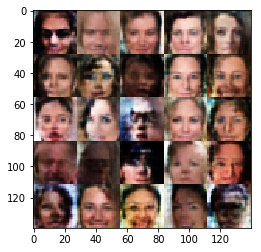

Epoch 1/1, iteration 2710: Discriminator Loss: 0.9872, Generator Loss: 1.1879
Epoch 1/1, iteration 2720: Discriminator Loss: 1.0968, Generator Loss: 0.8461
Epoch 1/1, iteration 2730: Discriminator Loss: 1.4598, Generator Loss: 0.5117
Epoch 1/1, iteration 2740: Discriminator Loss: 1.2014, Generator Loss: 0.9381
Epoch 1/1, iteration 2750: Discriminator Loss: 1.3125, Generator Loss: 0.6398
Epoch 1/1, iteration 2760: Discriminator Loss: 1.5763, Generator Loss: 0.4374
Epoch 1/1, iteration 2770: Discriminator Loss: 0.9708, Generator Loss: 1.1891
Epoch 1/1, iteration 2780: Discriminator Loss: 1.3374, Generator Loss: 0.6310
Epoch 1/1, iteration 2790: Discriminator Loss: 0.8499, Generator Loss: 1.4723
Epoch 1/1, iteration 2800: Discriminator Loss: 0.8047, Generator Loss: 1.4489


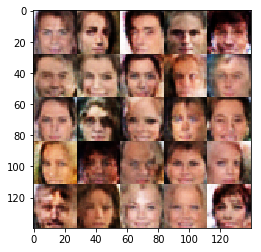

Epoch 1/1, iteration 2810: Discriminator Loss: 1.2745, Generator Loss: 0.6003
Epoch 1/1, iteration 2820: Discriminator Loss: 1.2708, Generator Loss: 0.8536
Epoch 1/1, iteration 2830: Discriminator Loss: 1.0466, Generator Loss: 1.1064
Epoch 1/1, iteration 2840: Discriminator Loss: 0.6797, Generator Loss: 1.5673
Epoch 1/1, iteration 2850: Discriminator Loss: 1.0836, Generator Loss: 1.0864
Epoch 1/1, iteration 2860: Discriminator Loss: 1.3715, Generator Loss: 0.5929
Epoch 1/1, iteration 2870: Discriminator Loss: 0.9871, Generator Loss: 1.6239
Epoch 1/1, iteration 2880: Discriminator Loss: 0.8238, Generator Loss: 1.4334
Epoch 1/1, iteration 2890: Discriminator Loss: 0.9953, Generator Loss: 1.7501
Epoch 1/1, iteration 2900: Discriminator Loss: 1.4255, Generator Loss: 0.5597


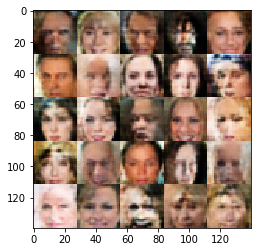

Epoch 1/1, iteration 2910: Discriminator Loss: 0.9552, Generator Loss: 1.3265
Epoch 1/1, iteration 2920: Discriminator Loss: 0.7082, Generator Loss: 2.2595
Epoch 1/1, iteration 2930: Discriminator Loss: 1.0358, Generator Loss: 0.9642
Epoch 1/1, iteration 2940: Discriminator Loss: 1.1265, Generator Loss: 0.8479
Epoch 1/1, iteration 2950: Discriminator Loss: 0.8333, Generator Loss: 2.1111
Epoch 1/1, iteration 2960: Discriminator Loss: 0.8488, Generator Loss: 1.1548
Epoch 1/1, iteration 2970: Discriminator Loss: 1.1505, Generator Loss: 1.1058
Epoch 1/1, iteration 2980: Discriminator Loss: 1.1657, Generator Loss: 0.9111
Epoch 1/1, iteration 2990: Discriminator Loss: 1.4540, Generator Loss: 1.0857
Epoch 1/1, iteration 3000: Discriminator Loss: 1.3357, Generator Loss: 0.5977


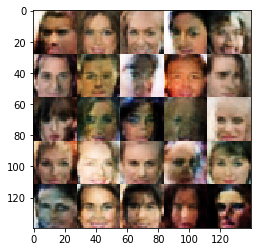

Epoch 1/1, iteration 3010: Discriminator Loss: 1.0114, Generator Loss: 0.9590
Epoch 1/1, iteration 3020: Discriminator Loss: 1.1717, Generator Loss: 0.7843
Epoch 1/1, iteration 3030: Discriminator Loss: 1.0013, Generator Loss: 1.0075
Epoch 1/1, iteration 3040: Discriminator Loss: 1.1989, Generator Loss: 0.7780
Epoch 1/1, iteration 3050: Discriminator Loss: 1.3598, Generator Loss: 0.6541
Epoch 1/1, iteration 3060: Discriminator Loss: 1.0335, Generator Loss: 0.9449
Epoch 1/1, iteration 3070: Discriminator Loss: 0.9794, Generator Loss: 1.1956
Epoch 1/1, iteration 3080: Discriminator Loss: 1.3225, Generator Loss: 1.6502
Epoch 1/1, iteration 3090: Discriminator Loss: 1.1933, Generator Loss: 0.8102
Epoch 1/1, iteration 3100: Discriminator Loss: 0.9030, Generator Loss: 1.5689


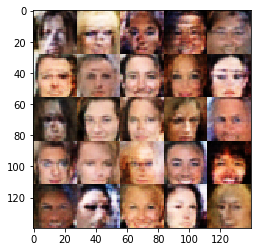

Epoch 1/1, iteration 3110: Discriminator Loss: 0.9329, Generator Loss: 1.2301
Epoch 1/1, iteration 3120: Discriminator Loss: 0.9855, Generator Loss: 1.1280
Epoch 1/1, iteration 3130: Discriminator Loss: 1.3662, Generator Loss: 0.6106
Epoch 1/1, iteration 3140: Discriminator Loss: 1.2006, Generator Loss: 0.8097
Epoch 1/1, iteration 3150: Discriminator Loss: 0.9202, Generator Loss: 1.0550
Epoch 1/1, iteration 3160: Discriminator Loss: 1.0793, Generator Loss: 1.0924


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.